Adapted from : https://mne.tools/dev/auto_examples/simulation/simulate_evoked_data.html

In [23]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os.path as op
import os
import numpy as np
import matplotlib.pyplot as plt
import mne
from mne.datasets import sample


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [131]:
if 'simulated-raw.fif' in os.listdir():
    raw = mne.io.read_raw_fif('simulated-raw.fif')
else:

    # For this example, we will be using the information of the sample subject.
    # This will download the data if it not already on your machine. We also set
    # the subjects directory so we don't need to give it to functions.
    data_path = sample.data_path()
    subjects_dir = op.join(data_path, 'subjects')
    subject = 'sample'

    # First, we get an info structure from the test subject.
    evoked_fname = op.join(data_path, 'MEG', subject, 'sample_audvis-ave.fif')
    info = mne.io.read_info(evoked_fname)
    tstep = 1. / info['sfreq']

    # To simulate sources, we also need a source space. It can be obtained from the
    # forward solution of the sample subject.
    fwd_fname = op.join(data_path, 'MEG', subject,
                        'sample_audvis-meg-eeg-oct-6-fwd.fif')
    fwd = mne.read_forward_solution(fwd_fname)
    src = fwd['src']

    source_simulator = mne.simulation.SourceSimulator(src, tstep=tstep)

    # To select a region to activate, we use the caudal middle frontal to grow
    # a region of interest.
    selected_label = mne.read_labels_from_annot(
        subject, regexp='inferiorparietal-lh', subjects_dir=subjects_dir)[0]
    location = 'center'  # Use the center of the region as a seed.
    extent = 10.  # Extent in mm of the region.
    label = mne.label.select_sources(
        subject, selected_label, location=location, extent=extent,
        subjects_dir=subjects_dir)

    # Define the time course of the activity for each source of the region to
    # activate. Here we use a sine wave at 10 Hz with a peak amplitude
    # of 10 nAm.
    source_time_series = np.sin(2. * np.pi * 10. * np.arange(25) * tstep) * 10e-9

    # Define when the activity occurs using events. The first column is the sample
    # of the event, the second is not used, and the third is the event id. Here the
    # events occur every 1000 samples.
    n_events = 100
    events = np.zeros((n_events, 3), int)
    events[:, 0] = 1000 * np.arange(n_events)  # Events sample.
    events[:, 2] = 1  # All events have the sample id.

    source_simulator.add_data(label, source_time_series, events)

    # add another source
    selected_label = mne.read_labels_from_annot(
        subject, regexp='superiorfrontal-lh', subjects_dir=subjects_dir)[0]
    location = 'center'  # Use the center of the region as a seed.
    extent = 10.  # Extent in mm of the region.
    label = mne.label.select_sources(
        subject, selected_label, location=location, extent=extent,
        subjects_dir=subjects_dir)

    source_time_series = np.sin(2. * np.pi * 10. * np.arange(25) * tstep) * 10e-9
    events2 = events.copy()
    events2[:,0] = events2[:,0] + 400
    events2[:,2] = 2
    source_simulator.add_data(label, source_time_series, events2)

    # and another
    selected_label = mne.read_labels_from_annot(
        subject, regexp='temporalpole-rh', subjects_dir=subjects_dir)[0]
    location = 'center'  # Use the center of the region as a seed.
    extent = 10.  # Extent in mm of the region.
    label = mne.label.select_sources(
        subject, selected_label, location=location, extent=extent,
        subjects_dir=subjects_dir)

    source_time_series = np.sin(2. * np.pi * 10. * np.arange(25) * tstep) * 10e-9
    events2 = events.copy()
    events2[:,0] = events2[:,0] + 300
    events2[:,2] = 2
    source_simulator.add_data(label, source_time_series, events2)
    
    # Project the source time series to sensor space and add some noise. The source
    # simulator can be given directly to the simulate_raw function.
    raw = mne.simulation.simulate_raw(info, source_simulator, forward=fwd, n_jobs=-1)
    cov = mne.make_ad_hoc_cov(raw.info)
    mne.simulation.add_noise(raw, cov, iir_filter=[0.2, -0.2, 0.04])
    #raw.plot()

    #raw.save('simulated-raw.fif')

    Read a total of 4 projection items:
        PCA-v1 (1 x 102) active
        PCA-v2 (1 x 102) active
        PCA-v3 (1 x 102) active
        Average EEG reference (1 x 60) active
Reading forward solution from /home/gweindel/mne_data/MNE-sample-data/MEG/sample/sample_audvis-meg-eeg-oct-6-fwd.fif...
    Reading a source space...
    Computing patch statistics...
    Patch information added...
    Distance information added...
    [done]
    Reading a source space...
    Computing patch statistics...
    Patch information added...
    Distance information added...
    [done]
    2 source spaces read
    Desired named matrix (kind = 3523) not available
    Read MEG forward solution (7498 sources, 306 channels, free orientations)
    Desired named matrix (kind = 3523) not available
    Read EEG forward solution (7498 sources, 60 channels, free orientations)
    MEG and EEG forward solutions combined
    Source spaces transformed to the forward solution coordinate frame
Reading labels fro

Trigger channel has a non-zero initial value of 1 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
299 events found
Event IDs: [1 2]
Trigger channel has a non-zero initial value of 1 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
299 events found
Event IDs: [1 2]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 661 samples (6.610 sec)

Trigger channel has a non-zero initial value

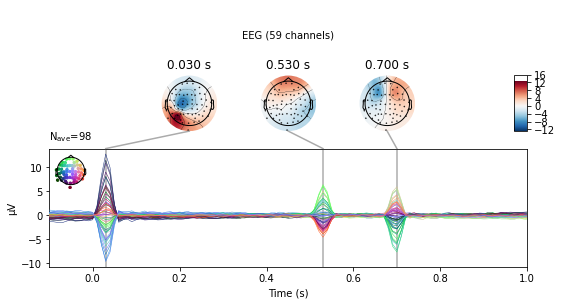

In [132]:
raw_ds = raw.load_data().copy().resample(100)

tmin, tmax = -0.1, 1

raw_ds.filter(.5, 30, fir_design='firwin')
events = mne.find_events(raw_ds)

picks = mne.pick_types(raw_ds.info, meg=False, eeg=True, stim=False, eog=False,
                       exclude='bads')

epochs = mne.Epochs(raw_ds, events, 1, tmin, tmax, proj=False,
                    picks=picks, baseline=None, preload=True,
                    verbose=False,detrend=1)
epochs.average().plot_joint()
X = epochs.copy().get_data()

In [133]:
np.shape(X)

(98, 59, 111)

In [134]:
import xarray as xr
data = xr.Dataset(
            {
                "data": (["epochs", "electrodes", "samples"],X),
            },
            attrs={'sfreq':epochs.info['sfreq']}
            )


## Computing cov matrices by trial and take the average of those

In [135]:
def vcov_mat(x):
    return x @ x.T

In [136]:
var_cov_matrices = []
for i,trial_dat in data.groupby('epochs'):
    var_cov_matrices.append(vcov_mat(trial_dat.data.to_numpy())) #Would be nice not to have a for loop but groupby.map seem to fal

In [137]:
average_var_cov_matrix = np.mean(var_cov_matrices,axis=0)

## Performing spatial PCA on the average var-cov matrix

In [138]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10, svd_solver='arpack')#selecting 10 Principale components (PC)
pca_data = pca.fit_transform(average_var_cov_matrix)

#Rebuilding pca PCs as xarray to ease computation
coords = dict(electrodes=("electrodes", data.coords["electrodes"].values),
             compoment=("component", np.arange(10)))
pca_data = xr.DataArray(pca_data, dims=("electrodes","component"), coords=coords)
pca_data = data.data @ pca_data

z-scoring the PCs by trial

In [139]:
def zscore(x):
    data = x
    return (data - data.mean()) / data.std()
z_scored = pca_data.groupby('epochs').map(zscore)

Plotting to show the  time series of the components

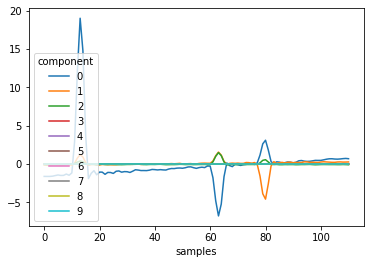

In [140]:
z_scored.mean(dim=['epochs']).plot.line(x='samples', hue="component");

Note for self : normalization might not be correct, TOCHECK

# Applying HsMM

In [141]:
import pyhsmm_mvpa as hsmm

this part is rather not very pythonic because it is adapted from matlab

In [142]:
stacked = z_scored.stack(all_samples=['epochs',"samples"]).dropna(dim="all_samples")

In [143]:
stacked

<xarray.DataArray (component: 10, all_samples: 10878)>
array([[-6.94015950e-01, -1.56682292e+00, -2.30951518e+00, ...,
         3.14348697e-01,  8.60478329e-01,  7.58566871e-01],
       [-2.86023172e-01, -1.97442031e-02,  1.15781696e-01, ...,
         9.58209433e-02,  3.82455130e-02,  2.76261089e-01],
       [-1.04812608e-01,  7.70976248e-02,  2.69753439e-01, ...,
        -2.29207149e-01, -2.25440199e-01, -1.07789340e-01],
       ...,
       [-8.02738619e-03, -6.75257881e-02, -6.85297911e-03, ...,
        -3.79963409e-02, -1.04414596e-02,  1.34412473e-02],
       [-2.21043246e-04,  8.04230239e-02,  4.86114799e-02, ...,
        -2.89714659e-02, -7.76701291e-03,  3.88823369e-02],
       [-2.45585060e-02,  1.94583314e-02,  9.21616440e-02, ...,
        -6.17148768e-02, -7.61580370e-03,  4.96102569e-02]])
Coordinates:
    compoment    (component) int64 0 1 2 3 4 5 6 7 8 9
  * all_samples  (all_samples) MultiIndex
  - epochs       (all_samples) int64 0 0 0 0 0 0 0 0 ... 97 97 97 97 97 97 97 97
  - samples      (all_samples) int64 0 1 2 3 4 5 6 ... 105 106 107 108 109 110
Dimensions without coordinates: component

In [144]:
data

<xarray.Dataset>
Dimensions:  (epochs: 98, electrodes: 59, samples: 111)
Dimensions without coordinates: epochs, electrodes, samples
Data variables:
    data     (epochs, electrodes, samples) float64 2.656e-06 ... -1.115e-06
Attributes:
    sfreq:    100.0

In [145]:
durations = np.unique(data.stack(trial=['epochs']).reset_index(['epochs']).groupby('trial').count(dim="samples").sel(electrodes=0).data.cumsum().to_numpy())
starts = np.insert(durations[:-1],0,0)
ends = durations-1

In [165]:
init = hsmm.hsmm(stacked.to_numpy().T, starts, ends, sf=data.sfreq, bump_width=40)
estimates = init.fit_single(3)

Estimating parameters for 3 bumps model


/home/gweindel/owncloud/projects/RUGUU/pyhsmm-mvpa/pyhsmm_mvpa.py:177: UserWarning: Using default parameters value for gamma parameters
  warnings.warn('Using default parameters value for gamma parameters')
/home/gweindel/owncloud/projects/RUGUU/pyhsmm-mvpa/pyhsmm_mvpa.py:183: UserWarning: Using default parameters value for magnitudes
  warnings.warn('Using default parameters value for magnitudes')


Parameters estimated for 3 bumps model


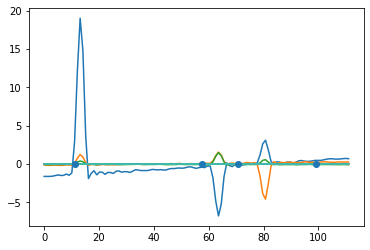

In [166]:
times = init.bump_times(estimates, time=False)
for comp in np.arange(10):
    plt.plot(np.linspace(0,111,111),z_scored.mean(dim=['epochs'])[:,comp])
plt.plot(np.cumsum(times), -np.repeat(0, len(times)),'o')

In [148]:
import multiprocessing

cpus = multiprocessing.cpu_count()

with multiprocessing.Pool(processes=cpus) as pool:
    iterative_results = pool.map(init.fit_single, np.arange(1,10+1))
iterative_results = xr.concat(iterative_results, dim="n_bumps")
#For the single CPU automated version : init.fit_iterative(init.max_bumps())

Estimating parameters for 1 bumps model
Estimating parameters for 2 bumps model


/home/gweindel/owncloud/projects/RUGUU/pyhsmm-mvpa/pyhsmm_mvpa.py:177: UserWarning: Using default parameters value for gamma parameters
  warnings.warn('Using default parameters value for gamma parameters')
/home/gweindel/owncloud/projects/RUGUU/pyhsmm-mvpa/pyhsmm_mvpa.py:177: UserWarning: Using default parameters value for gamma parameters
  warnings.warn('Using default parameters value for gamma parameters')
/home/gweindel/owncloud/projects/RUGUU/pyhsmm-mvpa/pyhsmm_mvpa.py:183: UserWarning: Using default parameters value for magnitudes
  warnings.warn('Using default parameters value for magnitudes')
/home/gweindel/owncloud/projects/RUGUU/pyhsmm-mvpa/pyhsmm_mvpa.py:183: UserWarning: Using default parameters value for magnitudes
  warnings.warn('Using default parameters value for magnitudes')


Estimating parameters for 3 bumps model


/home/gweindel/owncloud/projects/RUGUU/pyhsmm-mvpa/pyhsmm_mvpa.py:177: UserWarning: Using default parameters value for gamma parameters
  warnings.warn('Using default parameters value for gamma parameters')
/home/gweindel/owncloud/projects/RUGUU/pyhsmm-mvpa/pyhsmm_mvpa.py:183: UserWarning: Using default parameters value for magnitudes
  warnings.warn('Using default parameters value for magnitudes')


Estimating parameters for 4 bumps model


/home/gweindel/owncloud/projects/RUGUU/pyhsmm-mvpa/pyhsmm_mvpa.py:177: UserWarning: Using default parameters value for gamma parameters
  warnings.warn('Using default parameters value for gamma parameters')
/home/gweindel/owncloud/projects/RUGUU/pyhsmm-mvpa/pyhsmm_mvpa.py:183: UserWarning: Using default parameters value for magnitudes
  warnings.warn('Using default parameters value for magnitudes')


Estimating parameters for 7 bumps model
Estimating parameters for 8 bumps model

/home/gweindel/owncloud/projects/RUGUU/pyhsmm-mvpa/pyhsmm_mvpa.py:177: UserWarning: Using default parameters value for gamma parameters
  warnings.warn('Using default parameters value for gamma parameters')


/home/gweindel/owncloud/projects/RUGUU/pyhsmm-mvpa/pyhsmm_mvpa.py:183: UserWarning: Using default parameters value for magnitudes
  warnings.warn('Using default parameters value for magnitudes')
/home/gweindel/owncloud/projects/RUGUU/pyhsmm-mvpa/pyhsmm_mvpa.py:177: UserWarning: Using default parameters value for gamma parameters
  warnings.warn('Using default parameters value for gamma parameters')
/home/gweindel/owncloud/projects/RUGUU/pyhsmm-mvpa/pyhsmm_mvpa.py:183: UserWarning: Using default parameters value for magnitudes
  warnings.warn('Using default parameters value for magnitudes')


Estimating parameters for 9 bumps model


/home/gweindel/owncloud/projects/RUGUU/pyhsmm-mvpa/pyhsmm_mvpa.py:177: UserWarning: Using default parameters value for gamma parameters
  warnings.warn('Using default parameters value for gamma parameters')
/home/gweindel/owncloud/projects/RUGUU/pyhsmm-mvpa/pyhsmm_mvpa.py:183: UserWarning: Using default parameters value for magnitudes
  warnings.warn('Using default parameters value for magnitudes')


Estimating parameters for 10 bumps model


/home/gweindel/owncloud/projects/RUGUU/pyhsmm-mvpa/pyhsmm_mvpa.py:177: UserWarning: Using default parameters value for gamma parameters
  warnings.warn('Using default parameters value for gamma parameters')


Estimating parameters for 6 bumps model

/home/gweindel/owncloud/projects/RUGUU/pyhsmm-mvpa/pyhsmm_mvpa.py:183: UserWarning: Using default parameters value for magnitudes
  warnings.warn('Using default parameters value for magnitudes')


/home/gweindel/owncloud/projects/RUGUU/pyhsmm-mvpa/pyhsmm_mvpa.py:177: UserWarning: Using default parameters value for gamma parameters
  warnings.warn('Using default parameters value for gamma parameters')
/home/gweindel/owncloud/projects/RUGUU/pyhsmm-mvpa/pyhsmm_mvpa.py:183: UserWarning: Using default parameters value for magnitudes
  warnings.warn('Using default parameters value for magnitudes')


Estimating parameters for 5 bumps model


/home/gweindel/owncloud/projects/RUGUU/pyhsmm-mvpa/pyhsmm_mvpa.py:177: UserWarning: Using default parameters value for gamma parameters
  warnings.warn('Using default parameters value for gamma parameters')
/home/gweindel/owncloud/projects/RUGUU/pyhsmm-mvpa/pyhsmm_mvpa.py:183: UserWarning: Using default parameters value for magnitudes
  warnings.warn('Using default parameters value for magnitudes')


Parameters estimated for 1 bumps model
Parameters estimated for 2 bumps model
Parameters estimated for 3 bumps model
Parameters estimated for 4 bumps model
Parameters estimated for 5 bumps model
Parameters estimated for 6 bumps model
Parameters estimated for 7 bumps model
Parameters estimated for 8 bumps model
Parameters estimated for 10 bumps model
Parameters estimated for 9 bumps model


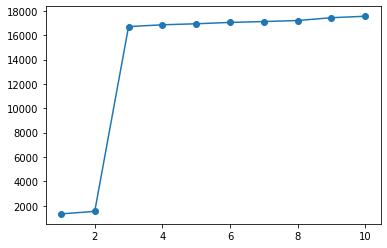

TypeError: bump_times() got an unexpected keyword argument 'times'

In [149]:
plt.plot(np.arange(10)+1, iterative_results.likelihoods,'o-')
plt.show()
for nbump in np.arange(10):
    times = init.bump_times(iterative_results.sel(n_bumps=nbump),times=False)
    plt.plot(np.cumsum(times), -np.repeat(nbump, len(times)),'o')


In [8]:
print(np.shape(pca_data))
n_epochs = np.shape(pca_data)[0]

(999, 10, 111)


In [9]:
pca_data = np.moveaxis(pca_data, 1, -1).T
pca_data = pca_data.flatten().reshape(pca_data.shape[0],pca_data.shape[1]*pca_data.shape[2]).T
print(np.shape(pca_data))


(110889, 10)


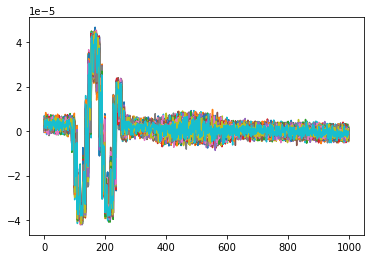

In [29]:
import matplotlib.pyplot as plt
test_starts = (epochs.time_as_index(epochs.times[-1]))  * np.arange(n_epochs)
slices = [np.arange(x,x+epochs.time_as_index(epochs.times[-1])) for x in test_starts]
plt.plot(pca_data[slices][:,:,0])

repeat the same data to have more datapoint?

In [9]:
#test_starts_multi = test_starts
#for sub in np.arange(1,20):
#    test_starts_multi = np.concatenate((test_starts_multi, test_starts + test_starts[-1] *sub ))
#pca_data_multi = np.tile(pca_data.T,(20,1))

In [36]:
import pyhsmm_mvpa as hsmm

init = hsmm.hsmm(pca_data, starts=test_starts, ends=test_starts+epochs.time_as_index(epochs.times[-1]), sf=epochs.info['sfreq'], bump_width=100)

In [37]:
two_bumps = init.fit_single(5)

Estimating parameters for 5 bumps model
Parameters estimated for 5 bumps model


In [38]:
two_bumps

<xarray.Dataset>
Dimensions:      (stage: 6, params: 2, component: 10, bump: 5, samples: 111,
                  trial: 999)
Dimensions without coordinates: stage, params, component, bump, samples, trial
Data variables:
    likelihoods  float64 -4.653e+03
    parameters   (stage, params) float64 2.0 5.179 2.0 8.522 ... 8.522 2.0 7.733
    magnitudes   (component, bump) float64 -1.009e-07 3.237e-08 ... 9.433e-09
    eventprobs   (samples, trial, bump) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0

In [39]:
two_bumps = init.fit_single(5, two_bumps.magnitudes.values,two_bumps.parameters.values)

Estimating parameters for 5 bumps model
Parameters estimated for 5 bumps model


In [40]:
two_bumps

<xarray.Dataset>
Dimensions:      (stage: 6, params: 2, component: 10, bump: 5, samples: 111,
                  trial: 999)
Dimensions without coordinates: stage, params, component, bump, samples, trial
Data variables:
    likelihoods  float64 -4.653e+03
    parameters   (stage, params) float64 2.0 5.179 2.0 8.522 ... 8.522 2.0 7.733
    magnitudes   (component, bump) float64 -1.009e-07 3.237e-08 ... 9.433e-09
    eventprobs   (samples, trial, bump) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0

In [13]:
import multiprocessing 

cpus = multiprocessing.cpu_count()
with multiprocessing.Pool(processes=cpus) as pool:
    test = pool.map(init.fit_single, np.arange(1,4))

Estimating parameters for 1 bumps model


/home/gweindel/owncloud/projects/RUGUU/pyhsmm-mvpa/pyhsmm_mvpa.py:160: UserWarning: Using default parameters value for magnitudes and gamma
  warnings.warn('Using default parameters value for magnitudes and gamma')


Estimating parameters for 2 bumps model


/home/gweindel/owncloud/projects/RUGUU/pyhsmm-mvpa/pyhsmm_mvpa.py:160: UserWarning: Using default parameters value for magnitudes and gamma
  warnings.warn('Using default parameters value for magnitudes and gamma')


Estimating parameters for 3 bumps model


/home/gweindel/owncloud/projects/RUGUU/pyhsmm-mvpa/pyhsmm_mvpa.py:160: UserWarning: Using default parameters value for magnitudes and gamma
  warnings.warn('Using default parameters value for magnitudes and gamma')


Parameters estimated for 1 bumps model
Parameters estimated for 2 bumps model
Parameters estimated for 3 bumps model
